In [5]:
import h5py
import numpy as np
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
def load_h5_file(file, num_cost_matrices):
    """Loads the train and test embeddings"""
    with h5py.File(file, 'r') as f:
        cost_matrices = {i:np.array(f[f'cost_matrix_{i}']) for i in range(num_cost_matrices)}
    return cost_matrices


In [3]:
len_dataset = 188
num_cost_matrices = len(list(combinations(range(len_dataset), r=2)))

print(f'Number of cost matrices: {num_cost_matrices}')

cost_matrices = load_h5_file('../data/cost_matrices.h5', num_cost_matrices)

Number of cost matrices: 17578


In [4]:
cost_matrices[0]

array([[0.13855484, 0.13845885, 1.84178903, 8.33910386, 4.33924013,
        1.54351854, 1.62207349, 1.62207708, 4.26150579, 8.12694368,
        1.97717433, 0.70526678, 1.67934353, 1.01150449, 4.58241239,
        4.76704108, 4.76704108],
       [1.36842527, 1.36843859, 1.13961124, 7.90360381, 3.57798544,
        0.53724399, 0.73316307, 0.73315077, 3.48328601, 7.67941813,
        1.34748111, 2.10670704, 2.37059793, 0.71430031, 4.63460039,
        5.01832703, 5.01832703],
       [2.45242473, 2.45243216, 2.27469461, 7.58660316, 2.93104686,
        2.04664173, 2.10657052, 2.10656624, 2.81480159, 7.35370117,
        2.38405153, 3.00860427, 3.24260571, 2.11382245, 5.16500119,
        5.23503958, 5.23503958],
       [1.36098197, 1.36099536, 1.1403106 , 7.90370468, 3.57820825,
        0.5387259 , 0.73424967, 0.73423739, 3.48351488, 7.67952195,
        1.34807263, 2.09980534, 2.36722034, 0.71541556, 4.6336976 ,
        5.01794937, 5.01794937],
       [0.27703624, 0.27700247, 1.96837194, 8.436694

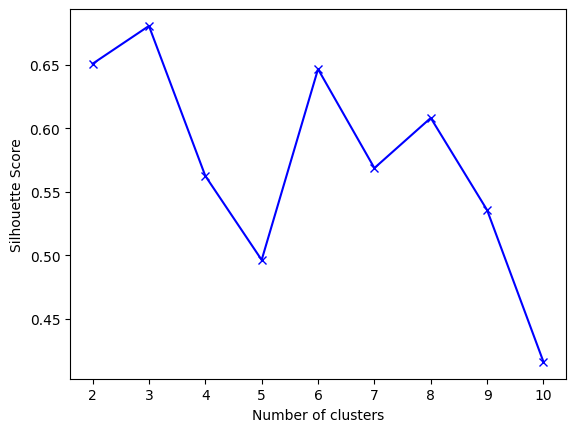

In [11]:
silhouette_avg = []
K = range(2, len(cost_matrices[0]) - 2)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cost_matrices[0])
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(cost_matrices[0], cluster_labels))
plt.plot(K, silhouette_avg, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()